In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
import torchvision.transforms as transforms

In [2]:
img = np.array(Image.open("data/train/NIR/imgset0594/HR.png"))

(384, 384)


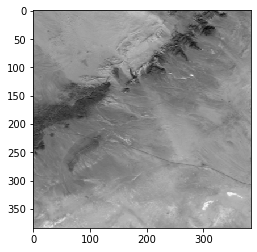

In [3]:
print(img.shape)
plt.imshow(img, cmap='gray')

In [4]:
# # "When more images are available we select the 9 clearest images according to the masks" - DeepSUM
# # I am just going to randomly select 9, partly because its easier, partly because maybe this will help the model be more 
# # resilient to cloud cover when testing

# # "As a
# # preprocessing step, all LR images are clipped to 2^14 - 1
# # since corrupted pixels with large values occur in the LR images
# # throughout the PROBA-V dataset."

# class TrainNIRDataset(torch.utils.data.Dataset):
#     """Some Satellite Shit."""

#     def __init__(self, upsample=True):
#         self.upsample = upsample
#         if self.upsample:
#             self.transform = transforms.Compose([transforms.Resize((384, 384), interpolation=Image.BICUBIC), transforms.ToTensor()]) 
#         else:
#             self.transform = transforms.ToTensor()
        
#     def __len__(self):
#         return 566

#     def __getitem__(self, idx):
#         start_index = 594
#         img_set_num = start_index + idx
#         img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
#         imgs_path = 'data/train/NIR/imgset' + str(img_set_filename)
        
#         num_LR = len([name for name in os.listdir(imgs_path)]) // 2 - 1
#         selected_LR = np.random.choice(num_LR, 9, replace=False)
#         LR_imgs = torch.cat([self.transform(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val)))))
#                             for val in selected_LR])
        
#         HR_img = np.array(Image.open(imgs_path + '/HR.png'))
        
#         sample = {'LR': torch.clamp(LR_imgs, min=0, max=2**14-1), 'HR': HR_img}
#         return sample
    
# class TestNIRDataset(torch.utils.data.Dataset):
#     """Some Satellite Shit."""

#     def __init__(self, upsample=True):
#         self.upsample = upsample
#         if self.upsample:
#             self.transform = transforms.Compose([transforms.Resize((384, 384), interpolation=Image.BICUBIC), transforms.ToTensor()]) 
#         else:
#             self.transform = transforms.ToTensor()

#     def __len__(self):
#         return 144

#     def __getitem__(self, idx):
        
#         start_index = 1306
#         img_set_num = start_index + idx
#         img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
#         imgs_path = 'data/test/NIR/imgset' + str(img_set_filename)

#         num_LR = len([name for name in os.listdir(imgs_path)]) // 2
#         selected_LR = np.random.choice(num_LR, 9, replace=False)
#         LR_imgs = torch.cat([self.transform(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val)))))
#                             for val in selected_LR])
        
#         sample = {'LR': torch.clamp(LR_imgs, min=0, max=2**14-1)}
#         return sample
    
# class TrainREDDataset(torch.utils.data.Dataset):
#     """Some Satellite Shit."""

#     def __init__(self, upsample=True):
#         self.upsample = upsample
#         if self.upsample:
#             self.transform = transforms.Compose([transforms.Resize((384, 384), interpolation=Image.BICUBIC), transforms.ToTensor()]) 
#         else:
#             self.transform = transforms.ToTensor()

#     def __len__(self):
#         return 594

#     def __getitem__(self, idx):
        
#         start_index = 0
#         img_set_num = start_index + idx
#         img_set_filename = str(img_set_num)
#         while len(img_set_filename) < 4:
#             img_set_filename = '0' + img_set_filename
#         imgs_path = 'data/train/RED/imgset' + str(img_set_filename)

#         num_LR = len([name for name in os.listdir(imgs_path)]) // 2 - 1
#         selected_LR = np.random.choice(num_LR, 9, replace=False)
#         LR_imgs = torch.cat([self.transform(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val)))))
#                             for val in selected_LR])
        
#         HR_img = np.array(Image.open(imgs_path + '/HR.png'))
        
#         sample = {'LR': torch.clamp(LR_imgs, min=0, max=2**14-1), 'HR': HR_img}
#         return sample

    
# class TestREDDataset(torch.utils.data.Dataset):
#     """Some Satellite Shit."""

#     def __init__(self, upsample=True):
#         self.upsample = upsample
#         if self.upsample:
#             self.transform = transforms.Compose([transforms.Resize((384, 384), interpolation=Image.BICUBIC), transforms.ToTensor()]) 
#         else:
#             self.transform = transforms.ToTensor()

#     def __len__(self):
#         return 146

#     def __getitem__(self, idx):
        
#         start_index = 1160
#         img_set_num = start_index + idx
#         img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
#         imgs_path = 'data/test/RED/imgset' + str(img_set_filename)

#         num_LR = len([name for name in os.listdir(imgs_path)]) // 2
#         selected_LR = np.random.choice(num_LR, 9, replace=False)
#         LR_imgs = torch.cat([self.transform(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val)))))
#                             for val in selected_LR])
        
#         sample = {'LR': torch.clamp(LR_imgs, min=0, max=2**14-1)}
#         return sample

from data import *
    

In [9]:
oof = TrainNIRDataset(upsample=True)

In [10]:
print(oof[0]['LR'].shape)

torch.Size([1, 9, 384, 384])


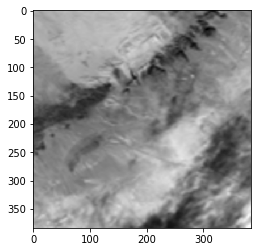

In [19]:
plt.imshow(oof[0]['LR'][0][0], cmap='gray')

In [13]:
print(oof[0]['LR'][0][0])

tensor([[10778, 10776, 10777,  ...,  9068,  9041,  9026],
        [10770, 10768, 10767,  ...,  9113,  9088,  9075],
        [10763, 10760, 10755,  ...,  9234,  9214,  9204],
        ...,
        [11291, 11261, 11187,  ..., 11441, 11481, 11499],
        [11204, 11184, 11135,  ..., 11398, 11440, 11459],
        [11180, 11164, 11124,  ..., 11382, 11425, 11444]], dtype=torch.int32)


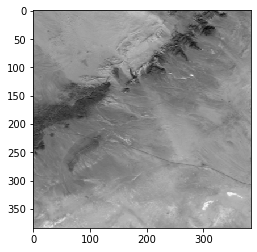

In [14]:
plt.imshow(oof[0]['HR'], cmap='gray')

In [15]:
oof2 = torch.utils.data.DataLoader(oof, batch_size=32, shuffle=False, num_workers=0)
oof3 = iter(oof2)

In [16]:
# print(next(iter(oof2)))
print(next(oof3)['LR'].shape)

torch.Size([32, 1, 9, 384, 384])
